#### GUFI Notebook 2

 - process flats

Moved the I band flats into the `/flat` folder

In [4]:
# load up modules (keep adding to these as we go along)

import sys
import os
import numpy as np
from astropy.io import fits
import pandas as pd

import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.io import fits as pyfits

In [2]:
!ls flat

Flat_I__001.fits  Flat_I__003.fits  Flat_I__005.fits
Flat_I__002.fits  Flat_I__004.fits  Flat_I__006.fits


Loop through each fits file, extract it's header, use this to determine the exposure time and number of observations per fits file

In [29]:
bias_dir = os.getcwd() + '/bias/'

In [17]:
flat_dir = os.getcwd() + '/flat/'

In [18]:
flat_list = os.listdir(flat_dir)

In [27]:
for flat in flat_list:
    this_flat = flat_dir + flat
    hdul = fits.open(this_flat)
    print (flat + '\t' + 'First frame: ' + hdul[0].header['FRAME'] + '\t' + 'Exposure (sec):' + str(hdul[0].header['EXPOSURE']) + '\t' + 'Number of integrations:' + str(hdul[0].header['NUMKIN']))     

Flat_I__005.fits	First frame: 2017-12-21T13:53:32.000	Exposure (sec):3.0	Number of integrations:60
Flat_I__003.fits	First frame: 2017-12-21T13:50:44.000	Exposure (sec):5.0	Number of integrations:10
Flat_I__006.fits	First frame: 2017-12-21T13:57:28.000	Exposure (sec):1.0	Number of integrations:60
Flat_I__001.fits	First frame: 2017-12-21T13:47:35.000	Exposure (sec):5.0	Number of integrations:1
Flat_I__004.fits	First frame: 2017-12-21T13:51:46.000	Exposure (sec):5.0	Number of integrations:10
Flat_I__002.fits	First frame: 2017-12-21T13:49:19.000	Exposure (sec):5.0	Number of integrations:1


Flat files 5 and 6 have the longest duration/depth... 

We'll generate two stacked images for each and plot them - we'll load up the masterbias too

In [28]:
def stack_images(filepath,biaspath):
    bias_data = fits.getdata(get_pkg_data_filename(biaspath),ext=0)
    image_stack_raw = fits.getdata(get_pkg_data_filename(filepath),ext=0)
    image_stack_biased =image_stack_raw - bias_data
    return(image_stack_biased)

In [30]:
bias_file = 'masterbias_11.fits'
biaspath = bias_dir + bias_file

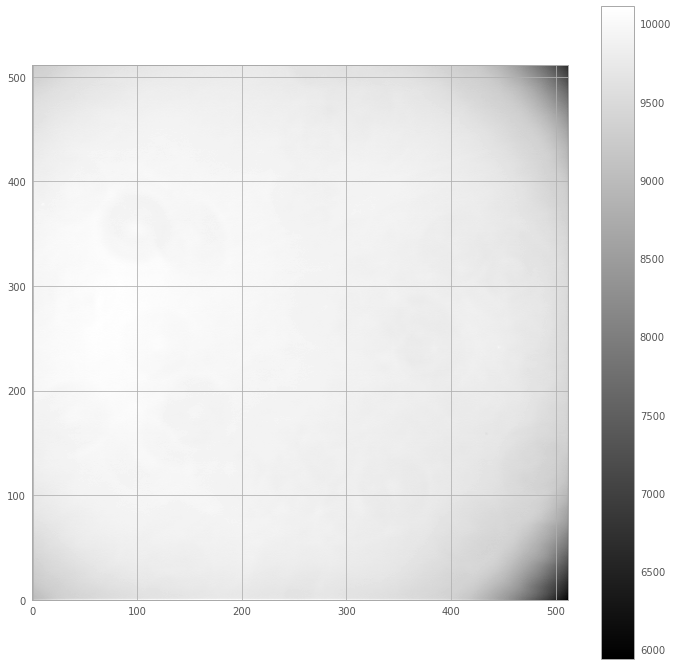

In [39]:
# Flat_I__005.fits
flatpath = flat_dir + 'Flat_I__005.fits'
this_flat_stack = stack_images(flatpath,biaspath)
master_flat05 = np.average(this_flat_stack, axis=0)
plt.figure(figsize=(12,12))
plt.imshow(master_flat05,  origin='lower', cmap='gray')
plt.colorbar();

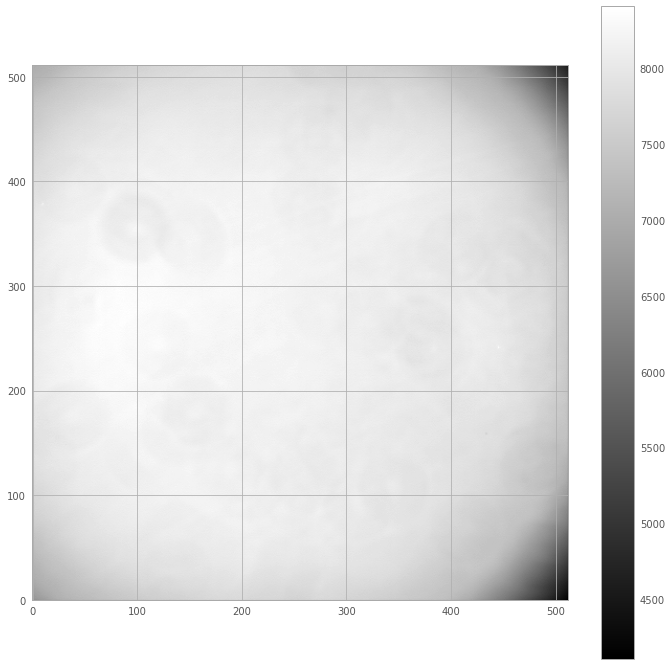

In [40]:
# Flat_I__006.fits
flatpath = flat_dir + 'Flat_I__006.fits'
this_flat_stack = stack_images(flatpath,biaspath)
master_flat06 = np.average(this_flat_stack, axis=0)
plt.figure(figsize=(12,12))
plt.imshow(master_flat06,  origin='lower', cmap='gray')
plt.colorbar();

Normalise and divide out to see if there are any differences...

divide by median value

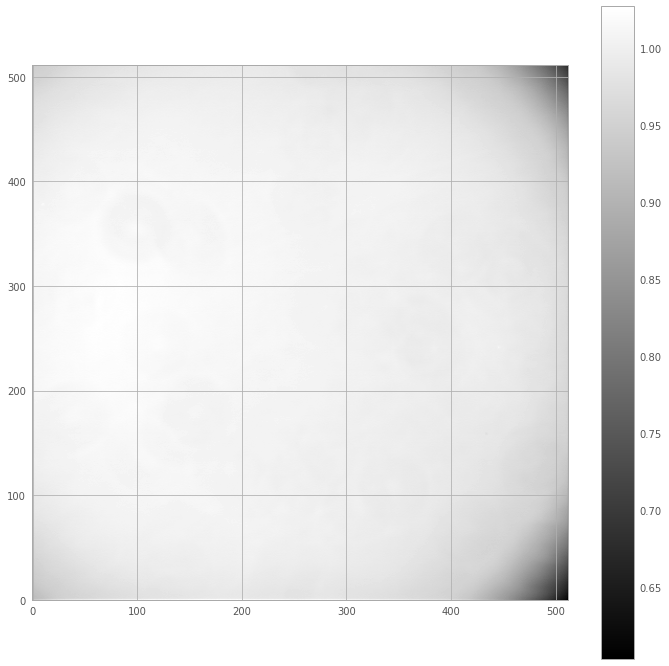

In [49]:
test05 = master_flat05/np.median(master_flat05)
plt.figure(figsize=(12,12))
plt.imshow(test05,  origin='lower', cmap='gray')
plt.colorbar();

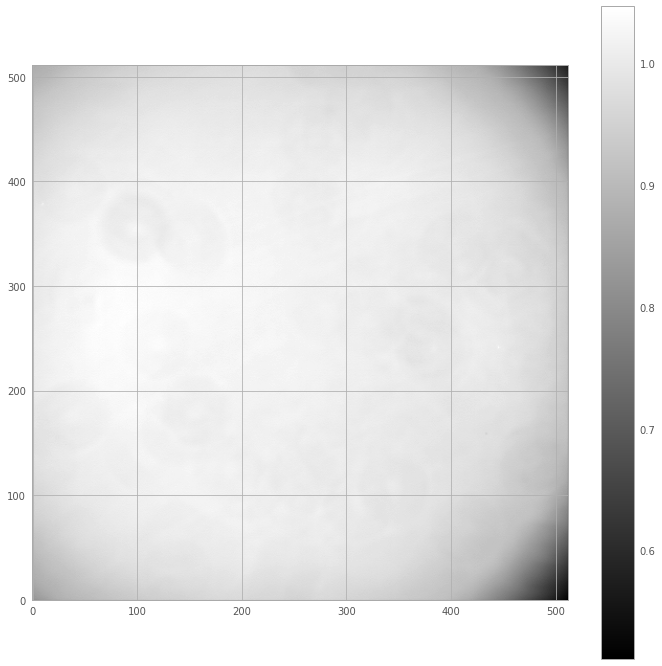

In [50]:
test05 = master_flat06/np.median(master_flat06)
plt.figure(figsize=(12,12))
plt.imshow(test06,  origin='lower', cmap='gray')
plt.colorbar();

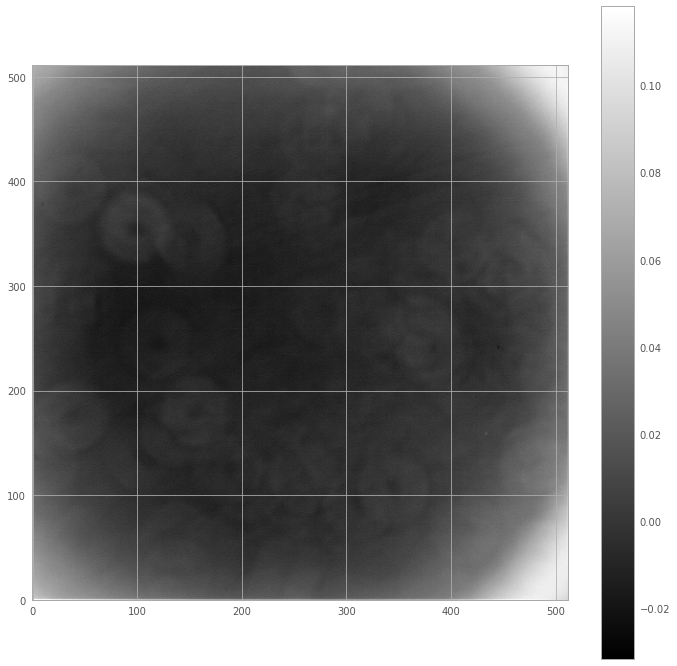

In [47]:
test05 = master_flat05/np.median(master_flat05)
test06 = master_flat06/np.median(master_flat06)
test0506 = test05 - test06
plt.figure(figsize=(12,12))
plt.imshow(test0506,  origin='lower', cmap='gray')
plt.colorbar();

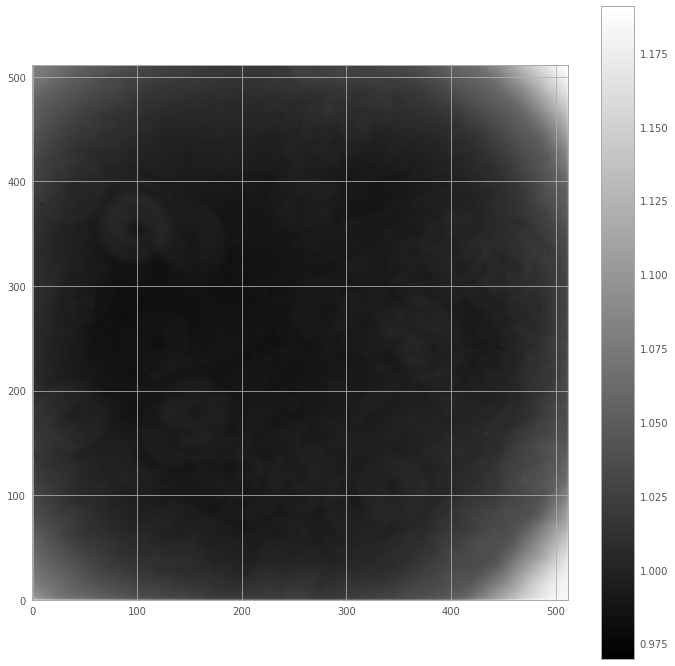

In [48]:
test05 = master_flat05/np.median(master_flat05)
test06 = master_flat06/np.median(master_flat06)
test0506 = test05/test06
plt.figure(figsize=(12,12))
plt.imshow(test0506,  origin='lower', cmap='gray')
plt.colorbar();

Flat__05 is looking like the better of the two

In [56]:
#Create a time-series for the median value per frame
frames05 = []
counts05 = []
cnt = 1
flatpath = flat_dir + 'Flat_I__005.fits'
this_flat_stack = stack_images(flatpath,biaspath)
for frame in this_flat_stack:
    counts05.append(np.median(frame))
    frames05.append(cnt)
    cnt = cnt + 1

frames06 = []
counts06 = []
cnt = 1
flatpath = flat_dir + 'Flat_I__006.fits'
this_flat_stack = stack_images(flatpath,biaspath)
for frame in this_flat_stack:
    counts06.append(np.median(frame))
    frames06.append(cnt)
    cnt = cnt + 1

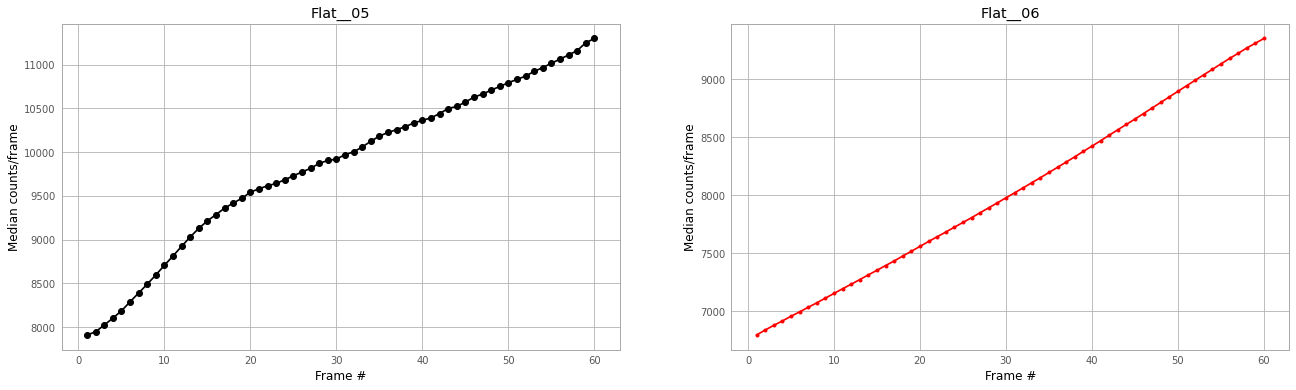

In [70]:

plt.figure(figsize = (22,6))
plt.subplot(1, 2, 1)
plt.plot(frames05, counts05, 'ko-')
plt.title('Flat__05')
plt.ylabel('Median counts/frame')
plt.xlabel('Frame #')
plt.subplot(1, 2, 2)
plt.title('Flat__06')
plt.plot(frames06, counts06, 'r.-')
plt.xlabel('Frame #')
plt.ylabel('Median counts/frame')



plt.show()

Interesting difference - Flat__5 had 3 sec cadence, Flat__06 had 1 second cadence. Might try both to see...